<a href="https://colab.research.google.com/github/AbuKhayrAZ/Venice-Boat-Classification-CNN/blob/main/Venice_Boat_Classfication_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Step 1: Import All Required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [20]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Set data path
data_dir = r'/content/drive/MyDrive/Venice_Boat_data1/boat data/test'

In [22]:
## Verify the path exists
if os.path.exists(data_dir):
    print(f"✓ Dataset found at: {data_dir}")
    # List subdirectories (boat categories)
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    print(f"✓ Categories found: {categories}")

✓ Dataset found at: /content/drive/MyDrive/Venice_Boat_data1/boat data/test
✓ Categories found: ['Lanciamaggioredi10mMarrone', 'Ambulanza', 'Lanciafino10m', 'Caorlina', 'Barchino', 'Lanciafino10mBianca', 'Gondola', 'Lanciamaggioredi10mBianca', 'Cacciapesca', 'Motobarca', 'Patanella', 'MotoscafoACTV', 'Sanpierota', 'Raccoltarifiuti', 'Sandoloaremi', 'Motopontonerettangolare', 'Polizia', 'VigilidelFuoco', 'Water', 'Lanciafino10mMarrone', 'Alilaguna', 'VaporettoACTV', 'Mototopo', 'Topa']


In [23]:
# Count total images
if os.path.exists(data_dir):
    print(f"✓ Dataset found at: {data_dir}")
    # List subdirectories (boat categories)
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

    if len(categories) == 0:
        print("✗ ERROR: No category folders found!")
        print("Your dataset should have subfolders for each boat class")
        print("Example structure: data_dir/gondola/, data_dir/motorboat/, etc.")
    else:
        print(f"✓ Categories found: {categories}")

        # Count total images
        total_images = 0
        for category in categories:
            cat_path = os.path.join(data_dir, category)
            num_images = len([f for f in os.listdir(cat_path) if f.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'))])
            print(f"  - {category}: {num_images} images")
            total_images += num_images
        print(f"✓ Total images: {total_images}")
else:
    print(f"✗ ERROR: Path not found: {data_dir}")
    print("Please update the 'data_dir' variable with your correct path")


✓ Dataset found at: /content/drive/MyDrive/Venice_Boat_data1/boat data/test
✓ Categories found: ['Lanciamaggioredi10mMarrone', 'Ambulanza', 'Lanciafino10m', 'Caorlina', 'Barchino', 'Lanciafino10mBianca', 'Gondola', 'Lanciamaggioredi10mBianca', 'Cacciapesca', 'Motobarca', 'Patanella', 'MotoscafoACTV', 'Sanpierota', 'Raccoltarifiuti', 'Sandoloaremi', 'Motopontonerettangolare', 'Polizia', 'VigilidelFuoco', 'Water', 'Lanciafino10mMarrone', 'Alilaguna', 'VaporettoACTV', 'Mototopo', 'Topa']
  - Lanciamaggioredi10mMarrone: 5 images
  - Ambulanza: 85 images
  - Lanciafino10m: 22 images
  - Caorlina: 1 images
  - Barchino: 112 images
  - Lanciafino10mBianca: 484 images
  - Gondola: 24 images
  - Lanciamaggioredi10mBianca: 9 images
  - Cacciapesca: 34 images
  - Motobarca: 215 images
  - Patanella: 279 images
  - MotoscafoACTV: 11 images
  - Sanpierota: 5 images
  - Raccoltarifiuti: 94 images
  - Sandoloaremi: 13 images
  - Motopontonerettangolare: 18 images
  - Polizia: 71 images
  - VigilidelF

# **Set Hyperparameters**

In [24]:
# Set Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10
VALIDATION_SPLIT = 0.2

# **Data Augmentation and Loading**

In [25]:
print("\n--- Setting up Data Generators ---")


--- Setting up Data Generators ---


In [26]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0,1]
    rotation_range=20,           # Random rotation up to 20 degrees
    width_shift_range=0.2,       # Random horizontal shift
    height_shift_range=0.2,      # Random vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flip
    fill_mode='nearest',         # Fill empty pixels after transformations
    validation_split=VALIDATION_SPLIT
)

In [27]:
# Validation data generator (only rescaling, no augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

In [28]:
## Load training dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# OR(modern way)
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size=(IMG_HEIGHT, IMG_WIDTH),
#     batch_size=BATCH_SIZE
# )

Found 3830 images belonging to 24 classes.


In [29]:
# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# OR (Modern way)
# val_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(IMG_HEIGHT, IMG_WIDTH),
#     batch_size=BATCH_SIZE
# )

Found 944 images belonging to 24 classes.


In [30]:
# Get class information
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print(f"\n✓ Classes: {class_names}")
print(f"✓ Number of classes: {num_classes}")
print(f"✓ Training samples: {train_generator.samples}")
print(f"✓ Validation samples: {validation_generator.samples}")


✓ Classes: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water']
✓ Number of classes: 24
✓ Training samples: 3830
✓ Validation samples: 944


# **Visualize Sample Images**


--- Visualizing Sample Training Images ---


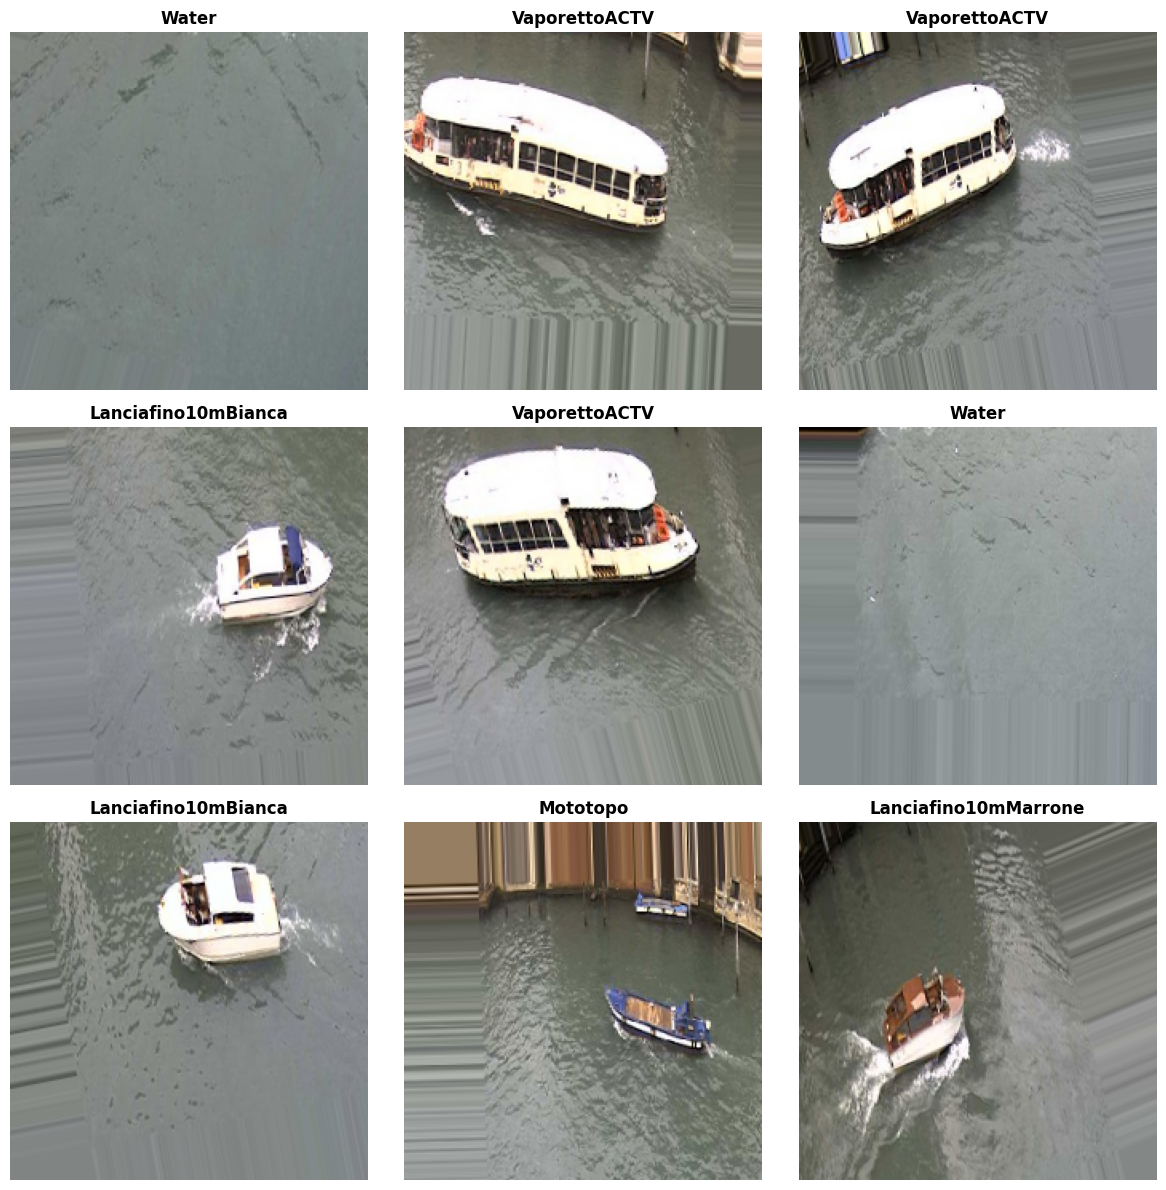

✓ Sample images displayed


In [32]:
print("\n--- Visualizing Sample Training Images ---")

plt.figure(figsize=(12, 12))
images, labels = next(train_generator)

for i in range(min(9, len(images))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    class_idx = np.argmax(labels[i])
    plt.title(f"{class_names[class_idx]}", fontsize=12, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Sample images displayed")


# **Build CNN Model using Sequential**

In [33]:
print("\n--- Building CNN Model ---")

model = Sequential([
    # Input Layer
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'),
    MaxPooling2D((2, 2), name='pool1'),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
    MaxPooling2D((2, 2), name='pool2'),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
    MaxPooling2D((2, 2), name='pool3'),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4'),
    MaxPooling2D((2, 2), name='pool4'),

    # Flatten and Fully Connected Layers
    Flatten(name='flatten'),
    Dropout(0.5, name='dropout1'),
    Dense(512, activation='relu', name='fc1'),
    Dropout(0.5, name='dropout2'),
    Dense(256, activation='relu', name='fc2'),
    Dropout(0.3, name='dropout3'),
    Dense(num_classes, activation='softmax', name='output')
], name='VeniceBoatClassifier')


--- Building CNN Model ---


In [34]:
# Display model architecture
model.summary()

Model: "VeniceBoatClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,216,536 (100.01 MB)

 Trainable params: 26,216,536 (100.01 MB)

 Non-trainable params: 0 (0.00 B)

# **Compile the Model**

In [35]:
print("\n--- Compiling Model ---")

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy')]
)
print("✓ Model compiled successfully")


--- Compiling Model ---
✓ Model compiled successfully


# **Setup** **Callbacks**

In [36]:
print("\n--- Setting up Callbacks ---")

callbacks_list = [
    # Save best model
    ModelCheckpoint(
        'best_boat_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    # Early stopping
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]
print("✓ Callbacks configured")


--- Setting up Callbacks ---
✓ Callbacks configured


# **Train the Model**

In [37]:
print("\n--- Starting Training ---")
print(f"Training for {EPOCHS} epochs...")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list,
    verbose=1
)

print("\n✓ Training completed!")


--- Starting Training ---
Training for 10 epochs...
Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.2788 - loss: 2.4725 - top_2_accuracy: 0.4337 
Epoch 1: val_accuracy improved from -inf to 0.52331, saving model to best_boat_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 3953s 33s/step - accuracy: 0.2798 - loss: 2.4695 - top_2_accuracy: 0.4345 - val_accuracy: 0.5233 - val_loss: 1.5704 - val_top_2_accuracy: 0.6472 - learning_rate: 0.0010
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5270 - loss: 1.6173 - top_2_accuracy: 0.6503
Epoch 2: val_accuracy did not improve from 0.52331
120/120 ━━━━━━━━━━━━━━━━━━━━ 67s 556ms/step - accuracy: 0.5270 - loss: 1.6170 - top_2_accuracy: 0.6503 - val_accuracy: 0.5064 - val_loss: 1.6114 - val_top_2_accuracy: 0.6239 - learning_rate: 0.0010
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5472 - loss: 1.4970 - top_2_accuracy: 0.6764
Epoch 3: val_accuracy improved from 0.52331 to 0.54237, saving model to best_boat_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 68s 563ms/step - accuracy: 0.5473 - loss: 1.4969 - top_2_accuracy: 0.6765 - val_accuracy: 0.5424 - val_loss: 1.5096 - val_top_2_accuracy: 0.6324 - learning_rate: 0.0010
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5675 - loss: 1.4099 - top_2_accuracy: 0.7003
Epoch 4: val_accuracy improved from 0.54237 to 0.61229, saving model to best_boat_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 68s 560ms/step - accuracy: 0.5676 - loss: 1.4097 - top_2_accuracy: 0.7004 - val_accuracy: 0.6123 - val_loss: 1.3817 - val_top_2_accuracy: 0.7214 - learning_rate: 0.0010
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.6088 - loss: 1.3278 - top_2_accuracy: 0.7196
Epoch 5: val_accuracy improved from 0.61229 to 0.62818, saving model to best_boat_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 578ms/step - accuracy: 0.6088 - loss: 1.3277 - top_2_accuracy: 0.7196 - val_accuracy: 0.6282 - val_loss: 1.2364 - val_top_2_accuracy: 0.7415 - learning_rate: 0.0010
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.6628 - loss: 1.2127 - top_2_accuracy: 0.7564
Epoch 6: val_accuracy improved from 0.62818 to 0.68750, saving model to best_boat_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 578ms/step - accuracy: 0.6629 - loss: 1.2122 - top_2_accuracy: 0.7564 - val_accuracy: 0.6875 - val_loss: 1.0828 - val_top_2_accuracy: 0.7881 - learning_rate: 0.0010
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.6684 - loss: 1.1759 - top_2_accuracy: 0.7669
Epoch 7: val_accuracy did not improve from 0.68750
120/120 ━━━━━━━━━━━━━━━━━━━━ 70s 576ms/step - accuracy: 0.6686 - loss: 1.1753 - top_2_accuracy: 0.7670 - val_accuracy: 0.6409 - val_loss: 1.2142 - val_top_2_accuracy: 0.7458 - learning_rate: 0.0010
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.7113 - loss: 1.0349 - top_2_accuracy: 0.7976
Epoch 8: val_accuracy did not improve from 0.68750
120/120 ━━━━━━━━━━━━━━━━━━━━ 67s 561ms/step - accuracy: 0.7113 - loss: 1.0346 - top_2_accuracy: 0.7976 - val_accuracy: 0.6674 - val_loss: 1.1382 - val_top_2_accuracy: 0.7701 - learning_rate: 0.0010
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.7478 - los

## Pre trained Models

 # **Plot Training History**


--- Plotting Training Results ---


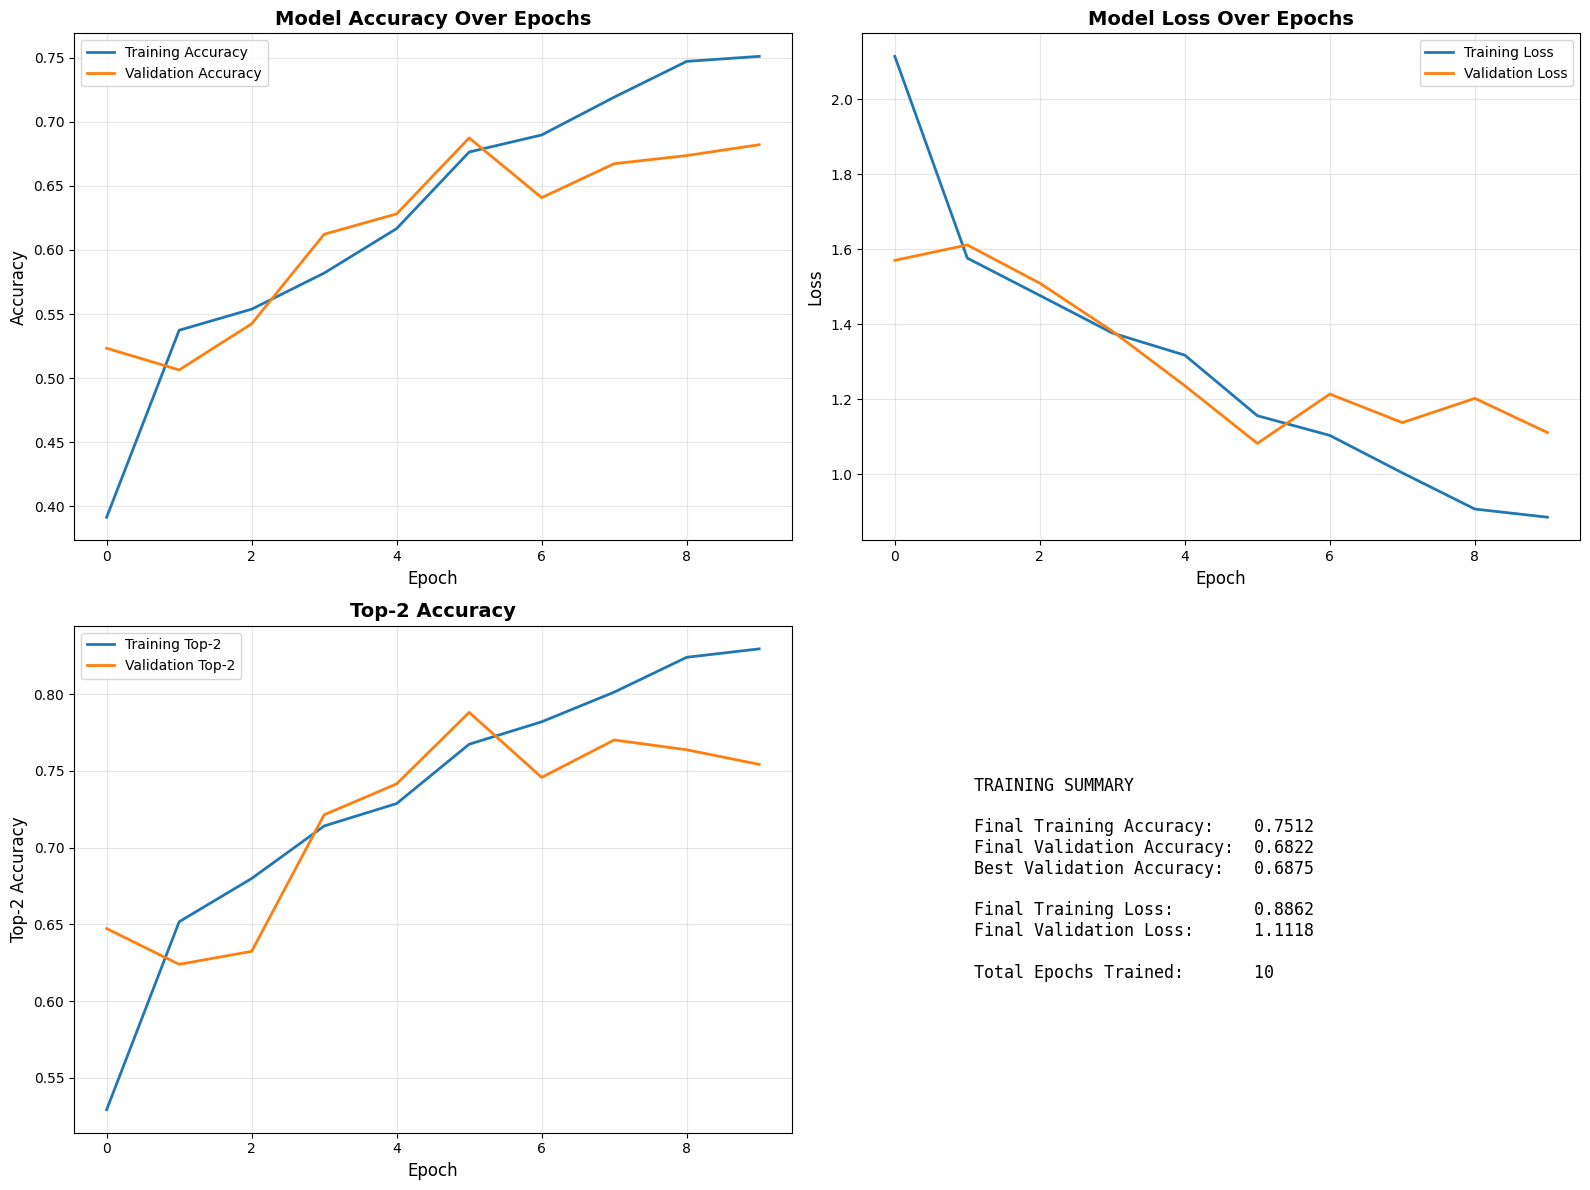

✓ Training plots saved


In [38]:
print("\n--- Plotting Training Results ---")

def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Training & Validation Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Training & Validation Loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('Loss', fontsize=12)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Top-2 Accuracy
    if 'top_2_accuracy' in history.history:
        axes[1, 0].plot(history.history['top_2_accuracy'], label='Training Top-2', linewidth=2)
        axes[1, 0].plot(history.history['val_top_2_accuracy'], label='Validation Top-2', linewidth=2)
        axes[1, 0].set_title('Top-2 Accuracy', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch', fontsize=12)
        axes[1, 0].set_ylabel('Top-2 Accuracy', fontsize=12)
        axes[1, 0].legend(fontsize=10)
        axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Summary Statistics
    axes[1, 1].axis('off')
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    best_val_acc = max(history.history['val_accuracy'])

    summary_text = f"""
    TRAINING SUMMARY

    Final Training Accuracy:    {final_train_acc:.4f}
    Final Validation Accuracy:  {final_val_acc:.4f}
    Best Validation Accuracy:   {best_val_acc:.4f}

    Final Training Loss:        {final_train_loss:.4f}
    Final Validation Loss:      {final_val_loss:.4f}

    Total Epochs Trained:       {len(history.history['accuracy'])}
    """

    axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12,
                    family='monospace', verticalalignment='center')

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
    plt.show()

plot_training_history(history)
print("✓ Training plots saved")


# **Evaluate Model**

In [39]:
print("\n--- Final Model Evaluation ---")

val_loss, val_accuracy, val_top2 = model.evaluate(validation_generator, verbose=1)
print(f"\n{'='*50}")
print(f"FINAL VALIDATION METRICS:")
print(f"{'='*50}")
print(f"Validation Loss:         {val_loss:.4f}")
print(f"Validation Accuracy:     {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Validation Top-2 Acc:    {val_top2:.4f} ({val_top2*100:.2f}%)")
print(f"{'='*50}")


--- Final Model Evaluation ---
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.5922 - loss: 1.3973 - top_2_accuracy: 0.7002

FINAL VALIDATION METRICS:
Validation Loss:         1.0828
Validation Accuracy:     0.6875 (68.75%)
Validation Top-2 Acc:    0.7881 (78.81%)


# **Prediction Function**

In [2]:
print("\n--- Creating Prediction Function ---")

def predict_boat_image(image_path, display=True):
    """
    Predict the boat type from an image

    Args:
        image_path: Path to the image file
        display: Whether to display the image with prediction

    Returns:
        predicted_class: Name of predicted boat class
        confidence: Confidence percentage
        all_probabilities: Dictionary of all class probabilities
    """
    # Load and preprocess image
    img = keras.preprocessing.image.load_img(
        image_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_idx]
    confidence = predictions[0][predicted_idx] * 100

    # Get all probabilities
    all_probs = {class_names[i]: predictions[0][i] * 100 for i in range(len(class_names))}
    all_probs = dict(sorted(all_probs.items(), key=lambda x: x[1], reverse=True))

    # Display if requested
    if display:
        plt.figure(figsize=(10, 6))

        # Show image
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%",
                  fontsize=12, fontweight='bold')
        plt.axis('off')

        # Show probability bar chart
        plt.subplot(1, 2, 2)
        classes = list(all_probs.keys())
        probs = list(all_probs.values())
        colors = ['green' if i == 0 else 'skyblue' for i in range(len(classes))]
        plt.barh(classes, probs, color=colors)
        plt.xlabel('Confidence (%)', fontsize=11)
        plt.title('Class Probabilities', fontsize=12, fontweight='bold')
        plt.xlim(0, 100)

        for i, v in enumerate(probs):
            plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

        plt.tight_layout()
        plt.show()

    return predicted_class, confidence, all_probs

# Example usage:
# predicted_class, confidence, all_probs = predict_boat_image('/content/drive/MyDrive/train_image.jpg')
# print(f"\nPredicted: {predicted_class} with {confidence:.2f}% confidence")

print("✓ Prediction function ready")


--- Creating Prediction Function ---
✓ Prediction function ready


# **Save Model to Google Drive**

In [41]:
print("\n--- Saving Model ---")

# Save to current directory
model.save('venice_boat_classifier_final.h5')
print("✓ Model saved locally as 'venice_boat_classifier_final.h5'")

# Copy to Google Drive
save_path = '/content/drive/MyDrive/Venice_Boat_data1/venice_boat_classifier_final.h5'
model.save(save_path)
print(f"✓ Model saved to Google Drive: {save_path}")


--- Saving Model ---


✓ Model saved locally as 'venice_boat_classifier_final.h5'
✓ Model saved to Google Drive: /content/drive/MyDrive/Venice_Boat_data1/venice_boat_classifier_final.h5


# **COMPLETION MESSAGE**

In [1]:
print("\n" + "="*60)
print("🎉 VENICE BOAT CLASSIFICATION PROJECT COMPLETED! 🎉")
print("="*60)
print("\nHappy Classifying! 🚤")
print("="*60)


🎉 VENICE BOAT CLASSIFICATION PROJECT COMPLETED! 🎉

Happy Classifying! 🚤
